# Markdown added in Jupyter Notebook after running notebook on Google Colab Pro+.

# Import required Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Using Google Drive to Get the dataset and load it

In [2]:
from google.colab import drive
drive.mount('/content/drive')

imdb_movies_data=pd.read_csv('drive/MyDrive/imdb_movies_data.csv')
imdb_movies_data.head()

Mounted at /content/drive


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Get the shape of the dataset

In [3]:
imdb_movies_data.shape

(1000, 12)

# Describe the properties of the dataset

In [4]:
imdb_movies_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# Describe the data type of each dataset

In [5]:
imdb_movies_data.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

# Get number of unique values of each dataset

In [6]:
print(imdb_movies_data.nunique())

Rank                  1000
Title                  999
Genre                  207
Description           1000
Director               644
Actors                 996
Year                    11
Runtime (Minutes)       94
Rating                  55
Votes                  997
Revenue (Millions)     814
Metascore               84
dtype: int64


# Use one hot encoding to split the Genre attribute 

In [7]:
list_here=[0]*1000
imdb_movies_data['Genre'].value_counts()
genres_list =imdb_movies_data['Genre'].tolist()
for genre_here in genres_list:
    gl=genre_here.split(",")
    for genre in gl:
        if genre not in imdb_movies_data:
            imdb_movies_data[genre]=list_here
imdb_movies_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,0,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,0,0,0,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,0,0,0,0,0,0,0,0,0,0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,0,0


# Set the one hot encoding values manually for each row

In [8]:

for index, row in imdb_movies_data.iterrows():
    gl=row['Genre'].split(",")
    for genre in gl:
        imdb_movies_data.at[index,genre]=1
        
imdb_movies_data.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,0,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,0,0,0,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,0,0,0,0,0,0,0,0,0,0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,0,0


# Drop the 'Genre' attribute

In [9]:
imdb_movies_data=imdb_movies_data.drop(['Genre'], axis = 1)
imdb_movies_data


,Rank,Title,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,...,0,0,0,0,0,0,0,0,0,0
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,...,0,0,0,0,0,0,0,0,0,0
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,...,0,0,0,0,0,0,0,0,0,0
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,...,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,...,1,0,0,0,0,1,0,0,0,0
996,997,Hostel: Part II,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,...,0,0,0,0,0,0,0,0,0,0
997,998,Step Up 2: The Streets,Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,...,1,1,0,1,0,0,0,0,0,0
998,999,Search Party,A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,...,0,0,0,0,0,0,0,0,0,0


# Print the Covariance of the new dataset

In [10]:
print('Covariance:')
imdb_movies_data.cov()

Covariance:


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Sci-Fi,...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
Rank,8.341667e+04,-242.231732,-1.204700e+03,-59.951351,-1.547644e+07,-8.080132e+03,-9.504849e+02,-17.962462,-19.234735,-10.563564,...,5.588088,1.317317,1.465966,9.349850,-3.144645,-1.584585,-0.076577,-0.667167,0.479980,1.434434
Year,-2.422317e+02,10.278189,-9.944621e+00,-0.640206,-2.492701e+05,-4.167756e+01,-4.334974e+00,-0.063312,-0.068866,-0.047007,...,0.077398,-0.004533,0.045623,-0.033436,0.027320,-0.018468,0.006526,-0.013192,-0.017933,-0.006100
Runtime (Minutes),-1.204700e+03,-9.944621,3.538503e+02,6.975285,1.445394e+06,5.155245e+02,6.761584e+01,1.081966,1.173626,0.386747,...,1.778543,-0.015768,0.762831,-0.023275,0.508521,0.336537,0.147944,0.021786,0.072212,0.092997
Rating,-5.995135e+01,-0.640206,6.975285e+00,0.893836,9.128979e+04,1.981433e+01,1.016151e+01,-0.032963,0.012704,-0.000785,...,0.118417,0.005634,0.045967,-0.005276,0.011739,0.009530,0.000338,0.008207,0.001085,0.005188
Votes,-1.547644e+07,-249270.096762,1.445394e+06,91289.789674,3.563134e+10,1.268983e+07,1.067272e+06,20003.870606,22861.627583,14982.589990,...,-12339.876692,-838.801882,-1447.062718,-6378.274229,-735.479875,869.738488,608.609825,780.462147,17.857583,-997.710300
Revenue (Millions),-8.080132e+03,-41.677565,5.155245e+02,19.814329,1.268983e+07,1.066129e+04,2.523088e+02,13.639376,20.605744,6.642455,...,-16.727159,-0.618020,-2.338241,-5.991369,-0.896493,-3.156956,0.165715,-0.338960,-0.007545,-0.329072
Metascore,-9.504849e+02,-4.334974,6.761584e+01,10.161506,1.067272e+06,2.523088e+02,2.956597e+02,-1.593238,-0.350027,-0.092294,...,2.287797,0.029133,0.756216,-0.494161,0.355528,-0.180632,-0.035198,0.070780,0.005428,0.044106
Action,-1.796246e+01,-0.063312,1.081966e+00,-0.032963,2.000387e+04,1.363938e+01,-1.593238e+00,0.211402,0.076600,0.037678,...,-0.083523,-0.004853,-0.013557,-0.035759,-0.004792,0.008559,-0.000121,-0.000940,-0.001517,-0.001455
Adventure,-1.923473e+01,-0.068866,1.173626e+00,0.012704,2.286163e+04,2.060574e+01,-3.500274e-01,0.076600,0.192111,0.027948,...,-0.080948,-0.004148,-0.012992,-0.030550,-0.006518,-0.030881,0.001188,-0.002369,-0.001296,-0.004667
Sci-Fi,-1.056356e+01,-0.047007,3.867467e-01,-0.000785,1.498259e+04,6.642455e+00,-9.229398e-02,0.037678,0.027948,0.105706,...,-0.033594,-0.001922,-0.009730,-0.009930,-0.003483,-0.017017,-0.000841,-0.001562,-0.000601,-0.002162


# Print the Correlation of the new dataset

In [11]:
print('Correlation:')
imdb_movies_data.corr()

Correlation:


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Sci-Fi,...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869,-0.135265,-0.151944,-0.112495,...,0.038690,0.036332,0.018594,0.092973,-0.064851,-0.015357,-0.003179,-0.020383,0.023550,0.037337
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305,-0.042951,-0.049008,-0.045098,...,0.048276,-0.011262,0.052132,-0.029953,0.050758,-0.016125,0.024401,-0.036309,-0.079265,-0.014304
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978,0.125098,0.142345,0.063236,...,0.189066,-0.006677,0.148560,-0.003554,0.161017,0.050078,0.094286,0.010219,0.054399,0.037166
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897,-0.075829,0.030657,-0.002553,...,0.250463,0.047473,0.178114,-0.016028,0.073956,0.028214,0.004285,0.076593,0.016264,0.041250
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684,0.230485,0.276322,0.244130,...,-0.130724,-0.035397,-0.028084,-0.097043,-0.023208,0.012897,0.038653,0.036483,0.001341,-0.039736
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397,0.281206,0.440002,0.193650,...,-0.323829,-0.046008,-0.080722,-0.163342,-0.051020,-0.085794,0.021244,-0.030815,-0.000967,-0.023733
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000,-0.200460,-0.046044,-0.016403,...,0.265984,0.013064,0.166018,-0.082791,0.121311,-0.029353,-0.025636,0.036571,0.004328,0.019779
Action,-0.135265,-0.042951,0.125098,-0.075829,0.230485,0.281206,-0.200460,1.000000,0.380098,0.252046,...,-0.363252,-0.084075,-0.108013,-0.223359,-0.062075,0.052104,-0.003158,-0.018038,-0.046739,-0.023798
Adventure,-0.151944,-0.049008,0.142345,0.030657,0.276322,0.440002,-0.046044,0.380098,1.000000,0.196121,...,-0.369308,-0.075388,-0.108588,-0.200173,-0.088569,-0.197216,0.032499,-0.047699,-0.041910,-0.080043
Sci-Fi,-0.112495,-0.045098,0.063236,-0.002553,0.244130,0.193650,-0.016403,0.252046,0.196121,1.000000,...,-0.206617,-0.047088,-0.109631,-0.087715,-0.063817,-0.146508,-0.031004,-0.042380,-0.026177,-0.049995


# Plot the bar graph for number of movies per year

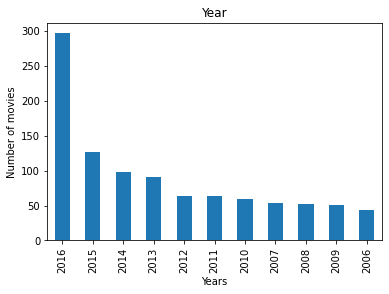

In [12]:
imdb_movies_data['Year'].value_counts().plot.bar(title="Year")
plt.xlabel("Years")
plt.ylabel("Number of movies")


plt.show()


# Draw the heatmap for the correlation between the attributes. Extreme values of positive and negative correlation indicate that the attributes are good attributes which can be selected. 

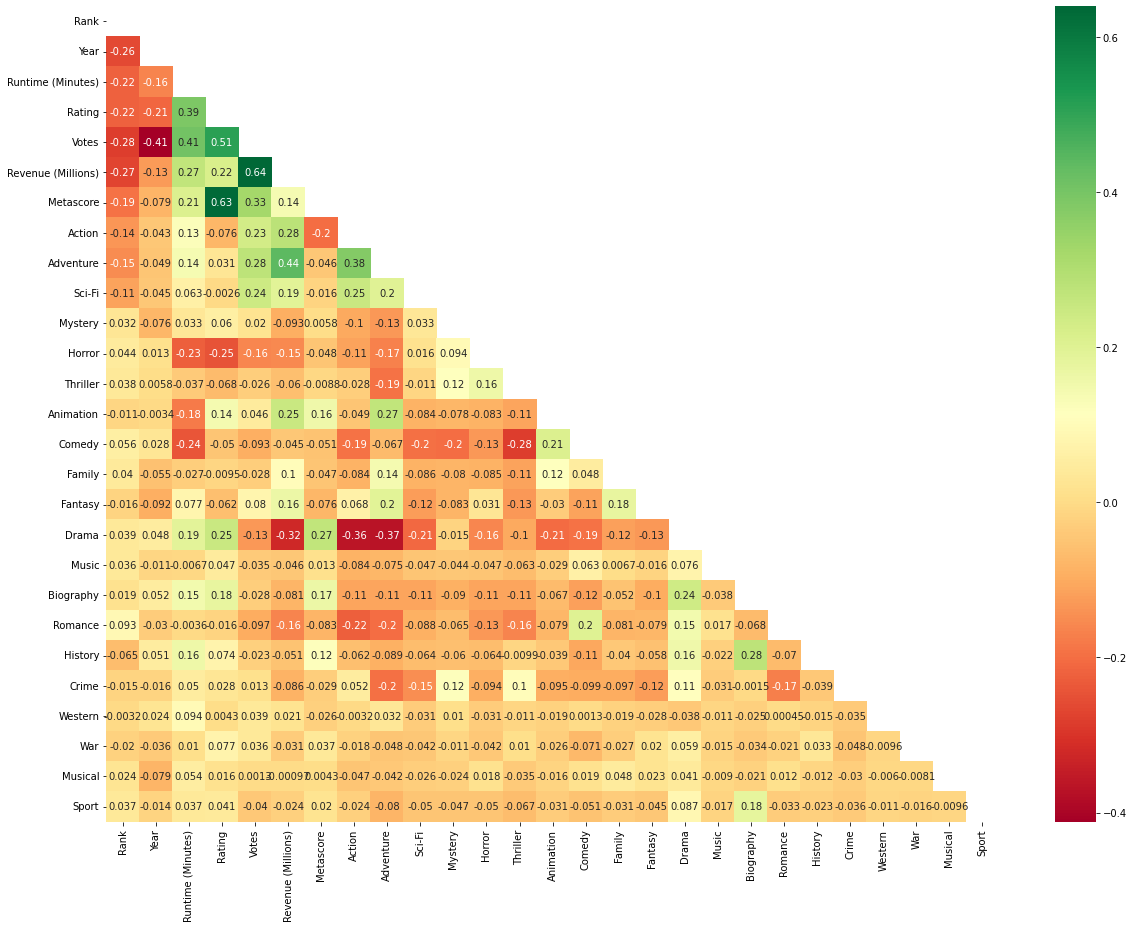

In [13]:
import seaborn as sns
corr = imdb_movies_data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

# Plot the scatter plot of Metascore vs Rating as they have a good correlation

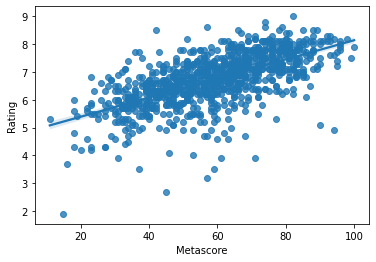

In [14]:
import seaborn as sns

sns.regplot(x=imdb_movies_data["Metascore"], y=imdb_movies_data["Rating"])

# Get number of movies for each genre

In [15]:
columns_list=imdb_movies_data.columns
columns_list=list(columns_list)
#print(columns_list)
columns_list.remove('Rank')
columns_list.remove('Actors')

columns_list.remove('Title')
columns_list.remove('Description')
columns_list.remove('Director')
columns_list.remove('Year')
columns_list.remove('Runtime (Minutes)')
columns_list.remove('Rating')
columns_list.remove('Votes')
columns_list.remove('Revenue (Millions)')

columns_list.remove('Metascore')
#columns_list.remove('numVotes')


genre_dict={}

for genre in columns_list:
  count=0
  for index, row in imdb_movies_data.iterrows():
     if imdb_movies_data.at[index,genre]==1:
       count+=1
  genre_dict[genre]=count

print(genre_dict)

  





{'Action': 303, 'Adventure': 259, 'Sci-Fi': 120, 'Mystery': 106, 'Horror': 119, 'Thriller': 195, 'Animation': 49, 'Comedy': 279, 'Family': 51, 'Fantasy': 101, 'Drama': 513, 'Music': 16, 'Biography': 81, 'Romance': 141, 'History': 29, 'Crime': 150, 'Western': 7, 'War': 13, 'Musical': 5, 'Sport': 18}


# Plot a pie chart to plot the Distribution of each genre in the movies dataset

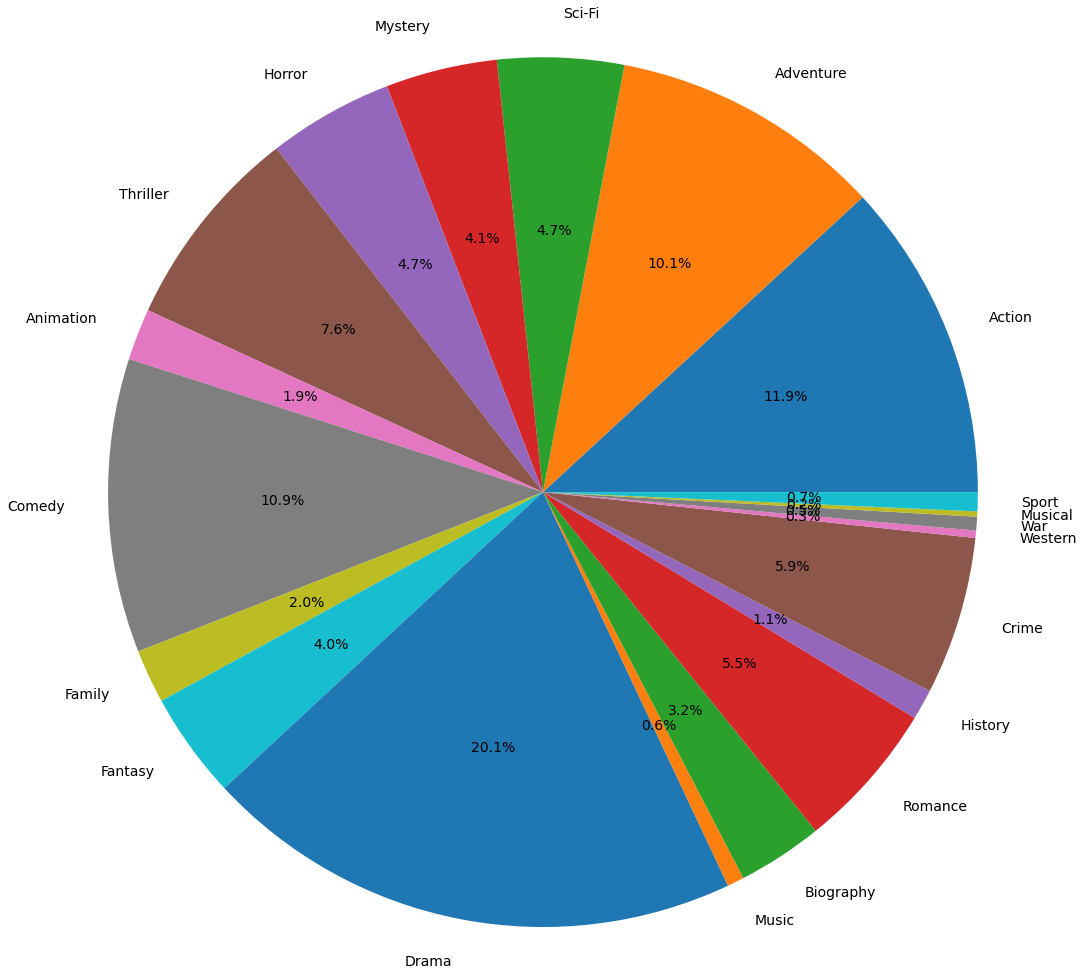

In [16]:
x_list_here=list(genre_dict.keys())
y_list_here=list(genre_dict.values())

plt.pie(y_list_here, labels = x_list_here,autopct="%1.1f%%",radius = 5,textprops={'fontsize': 14})
plt.show() 

# Find out the average rating and highest rating for movies belonging to each genre

In [17]:
genre_dict_for_bar_graph={}

genre_dict_for_bar_graph_1={}

genre_dict_for_bar_graph_2={}

for genre in x_list_here:
  genre_dict_for_bar_graph[genre]=[]

for genre in x_list_here:
  for index, row in imdb_movies_data.iterrows():
    if imdb_movies_data.at[index,genre]==1:
      genre_dict_for_bar_graph[genre].append(row["Rating"])


for genre in x_list_here:
  genre_dict_for_bar_graph_1[genre]=max(genre_dict_for_bar_graph[genre])
  float_value_2_places = str(round(sum(genre_dict_for_bar_graph[genre])/len(genre_dict_for_bar_graph[genre]), 2))

  genre_dict_for_bar_graph_2[genre]=float_value_2_places

print(genre_dict_for_bar_graph_1)


{'Action': 9.0, 'Adventure': 8.8, 'Sci-Fi': 8.8, 'Mystery': 8.5, 'Horror': 8.1, 'Thriller': 8.5, 'Animation': 8.6, 'Comedy': 8.6, 'Family': 8.5, 'Fantasy': 8.6, 'Drama': 9.0, 'Music': 8.5, 'Biography': 8.8, 'Romance': 8.4, 'History': 8.2, 'Crime': 9.0, 'Western': 8.4, 'War': 8.3, 'Musical': 7.6, 'Sport': 8.2}


# Plot a bar graph for highest IMDB rating for each genre

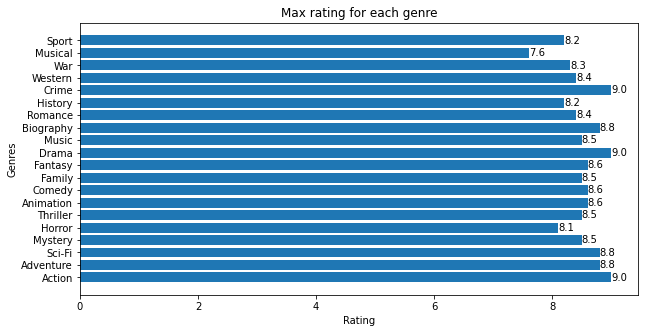

In [18]:
x_list_here=list(genre_dict_for_bar_graph_1.keys())
y_list_here=list(genre_dict_for_bar_graph_1.values())


fig = plt.figure(figsize = (10, 5))

plt.barh(x_list_here,y_list_here)


for index, value in enumerate(y_list_here):
    plt.text(value, index,str(value),fontsize=10,verticalalignment='center')

plt.title("Max rating for each genre")
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.show()





# Plot a bar graph for average IMDB rating for each genre

{'Horror': '6.09', 'Fantasy': '6.55', 'Thriller': '6.59', 'Action': '6.61', 'Comedy': '6.65', 'Family': '6.68', 'Romance': '6.69', 'Sci-Fi': '6.72', 'Adventure': '6.77', 'Western': '6.77', 'Crime': '6.79', 'Mystery': '6.89', 'Musical': '6.94', 'Drama': '6.95', 'Sport': '7.01', 'Music': '7.08', 'History': '7.13', 'Biography': '7.29', 'Animation': '7.32', 'War': '7.35'}


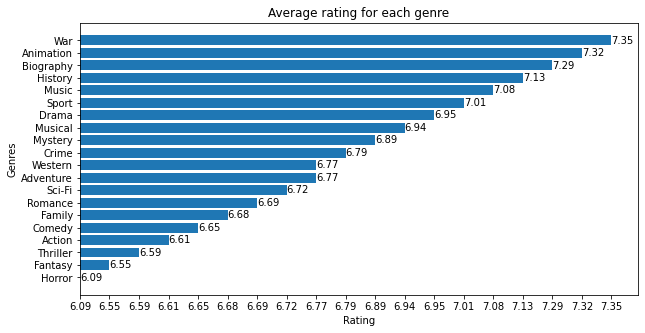

In [19]:
genre_dict_for_bar_graph_2={k: v for k, v in sorted(genre_dict_for_bar_graph_2.items(), key=lambda item: item[1])}

x_list_here=list(genre_dict_for_bar_graph_2.keys())
y_list_here=list(genre_dict_for_bar_graph_2.values())

print(genre_dict_for_bar_graph_2)

#y_list_here.sort()

fig = plt.figure(figsize = (10, 5))

plt.barh(x_list_here,y_list_here)


for index, value in enumerate(y_list_here):
    plt.text(value, index,str(value),fontsize=10,verticalalignment='center')

plt.title("Average rating for each genre")
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.show()





# Use only the highly correlated attributes for Regression models. Remove the attributes with low correlation values.

In [20]:
columns_list=imdb_movies_data.columns
columns_list=list(columns_list)
columns_list.remove('Rating')
columns_list.remove('Rank')
columns_list.remove('Title')
columns_list.remove('Description')
columns_list.remove('Actors')
columns_list.remove('Director')



#print(columns_list)
correlation_dict={}
for column in columns_list:
    correlation_here=imdb_movies_data['Rating'].corr(imdb_movies_data[column])
    if abs(correlation_here)>0.1:
        correlation_dict[column]=correlation_here
        

cols_list=list(correlation_dict.keys())
cols_list.append('Rating')
#print(cols_list)
    

# Print the new dataframe

In [21]:
imdb_movies_data_1=imdb_movies_data[cols_list]
imdb_movies_data_1

,Year,Runtime (Minutes),Votes,Revenue (Millions),Metascore,Horror,Animation,Drama,Biography,Rating
0,2014,121,757074,333.13,76.0,0,0,0,0,8.1
1,2012,124,485820,126.46,65.0,0,0,0,0,7.0
2,2016,117,157606,138.12,62.0,1,0,0,0,7.3
3,2016,108,60545,270.32,59.0,0,1,0,0,7.2
4,2016,123,393727,325.02,40.0,0,0,0,0,6.2
...,...,...,...,...,...,...,...,...,...,...
995,2015,111,27585,NaN,45.0,0,0,1,0,6.2
996,2007,94,73152,17.54,46.0,1,0,0,0,5.5
997,2008,98,70699,58.01,50.0,0,0,1,0,6.2
998,2014,93,4881,NaN,22.0,0,0,0,0,5.6


In [22]:

imdb_movies_data_1.head()


,Year,Runtime (Minutes),Votes,Revenue (Millions),Metascore,Horror,Animation,Drama,Biography,Rating
0,2014,121,757074,333.13,76.0,0,0,0,0,8.1
1,2012,124,485820,126.46,65.0,0,0,0,0,7.0
2,2016,117,157606,138.12,62.0,1,0,0,0,7.3
3,2016,108,60545,270.32,59.0,0,1,0,0,7.2
4,2016,123,393727,325.02,40.0,0,0,0,0,6.2


# Check if each attribute has no missing or 'NaN' values

In [23]:
imdb_movies_data_1['Year'].value_counts().sum()

1000

In [24]:
imdb_movies_data_1['Runtime (Minutes)'].value_counts().sum()

1000

In [25]:
imdb_movies_data_1['Votes'].value_counts().sum()

1000

In [26]:

imdb_movies_data_1['Revenue (Millions)'] = imdb_movies_data_1['Revenue (Millions)'].fillna(value=0)
imdb_movies_data_1['Revenue (Millions)'].value_counts().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1000

In [27]:

imdb_movies_data_1['Metascore'] = imdb_movies_data_1['Metascore'].fillna(value=0)
imdb_movies_data_1['Metascore'].value_counts().sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1000

# Plot another heatmap with the new dataframe

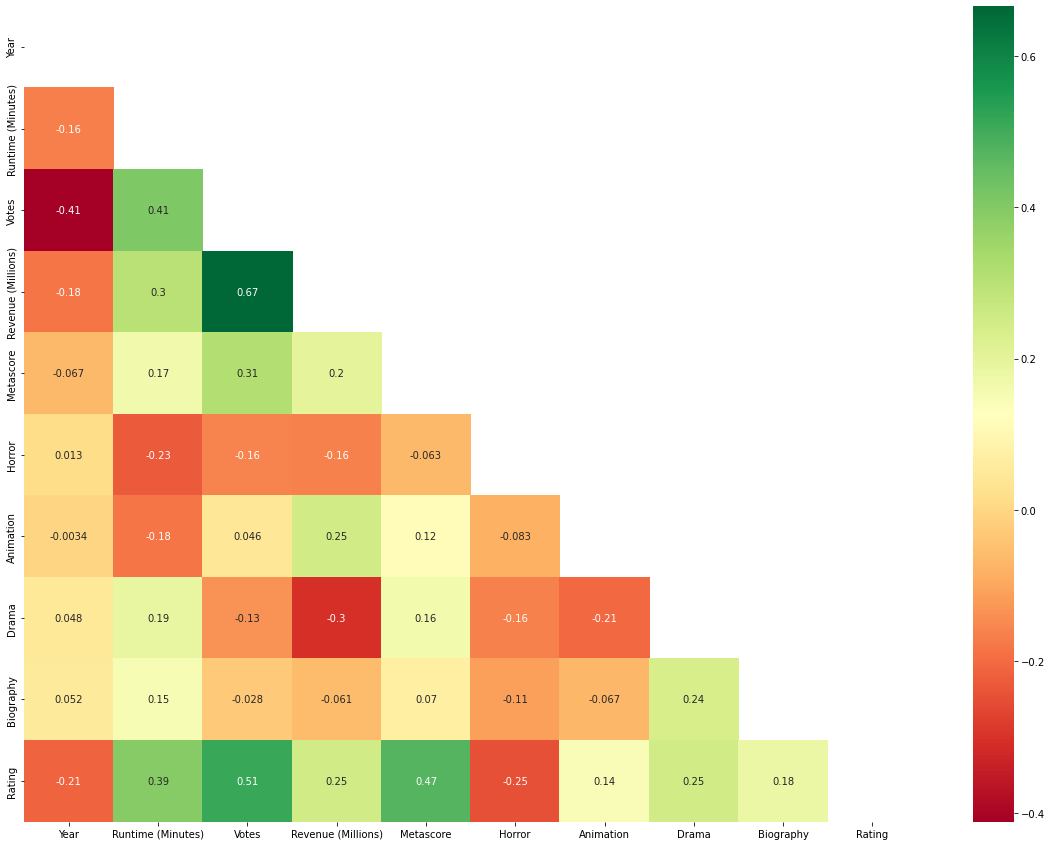

In [28]:
corr = imdb_movies_data_1.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

# Use train_test_split to split the dataset. We will be predicting the Rating attribute

In [29]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import metrics


y=imdb_movies_data['Rating']
data1=imdb_movies_data_1
data1 = data1.drop('Rating', 1)


X=data1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=123)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


# Use the Linear Regression model from python and get the required metrics: Mean Absolute Error, Mean Square Error and Root Mean Square Error

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

#print("Score",reg.score(X_test, y_test))

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
#reg.score(X_train, y_train)

MAE 0.482904927106944
MSE 0.34879507140283583
RMSE 0.5905887498105902


# Plot the original and predicted values for Linear Regression

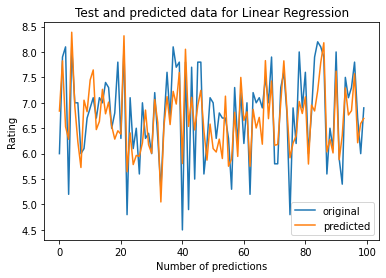

In [31]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data for Linear Regression")
plt.xlabel("Number of predictions")
plt.ylabel("Rating")
plt.legend()
plt.show()

# Use the Ridge Regression model and use RidgeCV from python to get the best alpha value. We can use this alpha value to get a better model and better accuracy.

In [32]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import RepeatedKFold


alphas = np.logspace(-8, 8, 17)
one = linear_model.RidgeCV(alphas=alphas, cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=123))


result = one.fit(X_train, y_train)
print(f"alphas tried: {alphas}")
print(f"best alpha from RidgeCV: {one.alpha_}, score {one.score(X, y)}")



alphas tried: [1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01
 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08]
best alpha from RidgeCV: 1.0, score 0.5076960121144474


# Print the required metrics: Mean Absolute Error, Mean Square Error and Root Mean Square Error

In [33]:
ridge = Ridge(alpha=one.alpha_)
ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 0.48281036400190963
MSE 0.34864508009777984
RMSE 0.590461751595969


# Plot the original and predicted values for Ridge Regression

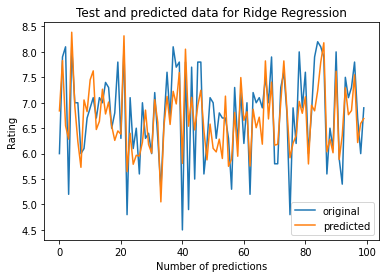

In [34]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data for Ridge Regression")
plt.xlabel("Number of predictions")
plt.ylabel("Rating")
plt.legend()
plt.show()

# Use the K-Neighbors Regressor model from python and get the required metrics: Mean Absolute Error, Mean Square Error and Root Mean Square Error

In [35]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=50)

KNN=model.fit(X_train,y_train)
y_pred=KNN.predict(X_test)



print("MAE",mean_absolute_error(y_test,y_pred))

print("MSE",mean_squared_error(y_test,y_pred))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


MAE 0.6360399999999999
MSE 0.57606408
RMSE 0.7589888536730958


# Plot the original and predicted values for K-Neigbours Regression

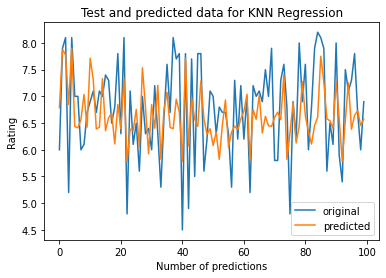

In [36]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data for KNN Regression")
plt.xlabel("Number of predictions")
plt.ylabel("Rating")
plt.legend()
plt.show()

# Use the Random Forest Regressor model from python and get the required metrics: Mean Absolute Error, Mean Square Error and Root Mean Square Error

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


rf = RandomForestRegressor()

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)


print('MAE ', metrics.mean_absolute_error(y_test, y_pred))
print("MSE ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))




MAE  0.48046999999999995
MSE  0.37421606999999973
RMSE 0.6117320246643948


# Plot the original and predicted values for Random Forest Regression

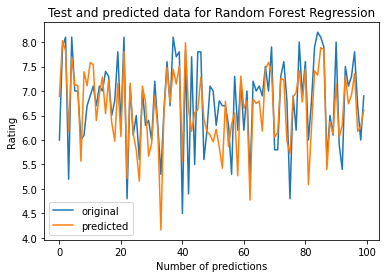

In [38]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data for Random Forest Regression")
plt.xlabel("Number of predictions")
plt.ylabel("Rating")
plt.legend()
plt.show()

# Use the Random Forest Regressor model with GridSearchCV from python and get the best parameters for a better model

In [39]:
parameters = {
'n_estimators': [25, 75, 100],
'max_depth':[1,2,3],
'max_features': ["auto","sqrt","log2"]
}

search = GridSearchCV(rf, parameters, cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=42))


best_model = search.fit(X_train,y_train)
print('The best accuracy score from this model is:')
print(best_model.best_score_)
print('The best hyperparameter configuration is:')
print(best_model.best_params_)







The best accuracy score from this model is:
0.44338396991575085
The best hyperparameter configuration is:
{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 75}


# Fit the model onto the dataset

In [40]:

rf1 = RandomForestRegressor(max_depth=best_model.best_params_['max_depth'],
                            max_features=best_model.best_params_['max_features'],
                            n_estimators=best_model.best_params_['n_estimators'])

rf1.fit(X_train,y_train)

y_pred=rf1.predict(X_test)

#y_pred=best_model.predict(X_test)


# Print the required metrics: Mean Absolute Error, Mean Square Error and Root Mean Square Error

In [41]:
print('MAE ', metrics.mean_absolute_error(y_test, y_pred))
print("MSE ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE  0.5041112700452847
MSE  0.40448402294054525
RMSE 0.6359905840030536


# Plot the original and predicted values for Random Forest Regression with GridSearchCV

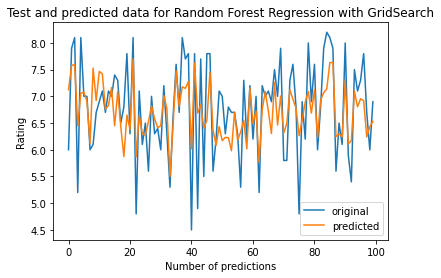

In [42]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data for Random Forest Regression with GridSearch")
plt.xlabel("Number of predictions")
plt.ylabel("Rating")
plt.legend()
plt.show()

# Get the XGBoost Module from python

In [43]:
import xgboost
print(xgboost.__version__)

0.90


In [44]:
xgbr = xgboost.XGBRegressor(verbosity=0) 
print(xgbr)


XGBRegressor(verbosity=0)


# Fit the model onto the dataset

In [45]:
xgbr.fit(X_train, y_train)


XGBRegressor(verbosity=0)

# Print the required metrics: Mean Absolute Error, Mean Square Error and Root Mean Square Error

In [46]:
y_pred = xgbr.predict(X_test)

print('MAE ', metrics.mean_absolute_error(y_test, y_pred))
print("MSE ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))



MAE  0.41313408279418945
MSE  0.2778394511899716
RMSE 0.5271047819835935


# Plot the original and predicted values for XGBoost Regression

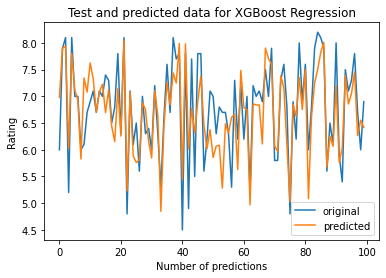

In [47]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data for XGBoost Regression")
plt.xlabel("Number of predictions")
plt.ylabel("Rating")
plt.legend()
plt.show()

# References:

[1] https://seaborn.pydata.org/generated/seaborn.heatmap.html

[2] https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data

[3] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

[4] https://docs.getml.com/latest/api/getml.predictors.XGBoostRegressor.html

[5] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[6] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

[7] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[8] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[9] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

[10] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

[11] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html

[12] https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.bar.html

[13] https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html

[14] https://developers.google.com/docs/api/quickstart/python

[15] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

[16] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html